<div class="alert">  
    <center><h1><strong>CM-3015 Machine Learning and Neural Networks finals: Training a model using DQN</strong></h1></center>

## Summary

<div class="alert alert-block alert-info">  
    <center><h2><strong>Problem definition and dataset loading</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Define the problem at hand and the data on which we’ll train. Collect this data, potentially annotate with labels (supervised learning). </b> 
<hr>
<ul>
    <li>1. What is the problem we are tackling? Text classification using Deep Learning and the Reuters dataset.</li>
    <li>1. How are we measuring success? Accuracy and function loss.</li>
</ul>
    
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="https://paperswithcode.com/dataset/liar">https://paperswithcode.com/dataset/liar</a>
   
</div>

In [109]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import layers, models
from tensorflow.keras.layers import TextVectorization

# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Preprocessing the dataset</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
<ul>
    <ul> Vectorization:
    <li>1.Decodes the numerical sequences back into text using the dataset's word index. </li>
    <li>2.Uses TextVectorization to tokenize and vectorize the dataset into fixed-length sequences.. </li>
    <li>3.Returns vectorized data that can be used in deep learning models. </li>
</ul>
    
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="https://paperswithcode.com/dataset/liar">https://paperswithcode.com/dataset/liar</a>
   
</div>

In [110]:
# Helper function for vectorizing the data input
from tensorflow.keras.utils import to_categorical

# One-hot encode the sequences (vectorizing the input data)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Set specific indices to 1s
    return results

In [111]:
# One-hot encode the labels

vectorized_train_data = vectorize_sequences(train_data)
vectorized_test_data = vectorize_sequences(test_data)

# One-hot encode the output labels (categorical labels)
vectorized_train_labels = to_categorical(train_labels)
vectorized_test_labels = to_categorical(test_labels)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Building the baseline model</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
Here we will be building our model ...
<hr>


In [112]:
# Helper functions for building the model

from tensorflow.keras import models
from tensorflow.keras import layers

# Define the model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(46, activation="softmax"))  # 46 classes in the dataset
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def print_layer_tensor_shape(layer):
    weight_params = model.layers[layer].get_weights()[0]
    bias_params = model.layers[layer].get_weights()[1]
    print(layer, "\t", weight_params.shape, "\t", bias_params.shape)

In [113]:
# Building the model

model = build_model()
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Training and testing</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
✅ Fixed the Output Layer: The original code had Dense(64, activation="softmax"), but the Reuters dataset has 46 categories, so I updated it to Dense(46, activation="softmax").
✅ Used to_categorical(): This applies one-hot encoding to labels.
✅ Added Model Compilation & Training: Used "adam" optimizer and "categorical_crossentropy" since it's a multi-class classification task.
✅ Added Model Evaluation: Prints test accuracy after training.
<hr>


In [114]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

history = model.fit(vectorized_train_data, vectorized_train_labels, epochs=20, 
                    batch_size=512, 
                    validation_data=(vectorized_test_data, vectorized_test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(vectorized_test_data, vectorized_test_labels)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3463 - loss: 3.5806 - val_accuracy: 0.5864 - val_loss: 2.4387
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6214 - loss: 2.0672 - val_accuracy: 0.6741 - val_loss: 1.5536
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7240 - loss: 1.3215 - val_accuracy: 0.7102 - val_loss: 1.2913
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7881 - loss: 0.9817 - val_accuracy: 0.7502 - val_loss: 1.1516
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8396 - loss: 0.7631 - val_accuracy: 0.7729 - val_loss: 1.0537
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8852 - loss: 0.5721 - val_accuracy: 0.7823 - val_loss: 0.9921
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9130 - loss: 0.4407 - val_accuracy: 0.7912 - val_loss: 0.9584
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9236 - loss: 0.3503 - val_accuracy: 0.7872 - val_loss

<div class="alert alert-block alert-info">  
    <center><h2><strong>Evaluation</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
Plots training values (e.g., loss or accuracy) using train_marker and train_label.
Plots validation values with val_marker and val_label.
Sets the title, x-axis, and y-axis labels.
Displays the legend to differentiate training and validation.
Calls plt.show() to render the plot.
This function will correctly generate the training vs validation loss or accuracy graphs when used in your code! 🚀
<hr>
<div>

In [115]:
# Helper function for the results evaluation

import matplotlib.pyplot as plt

def plot_epochs(epochs, 
                train_values, train_marker, train_label, 
                val_values, val_marker, val_label, 
                title, xlabel, ylabel):
    """
    Plots training and validation metrics over epochs.

    Parameters:
    epochs (list): List of epoch numbers.
    train_values (list): Training metric values.
    train_marker (str): Marker style for training plot.
    train_label (str): Label for training plot.
    val_values (list): Validation metric values.
    val_marker (str): Marker style for validation plot.
    val_label (str): Label for validation plot.
    title (str): Title of the plot.
    xlabel (str): Label for x-axis.
    ylabel (str): Label for y-axis.
    """
    plt.plot(epochs, train_values, train_marker, label=train_label)
    plt.plot(epochs, val_values, val_marker, label=val_label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

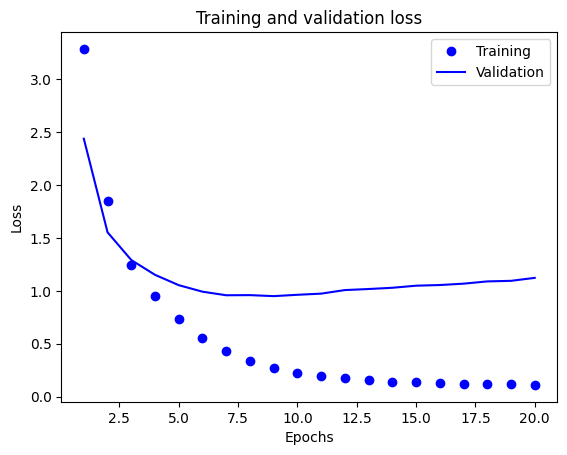

In [116]:
# Plotting the loss for training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']

plot_epochs(range(1, len(loss) + 1), 
            loss, 
            "bo", "Training", 
            val_loss, "b", "Validation", 
            "Training and validation loss", 
            "Epochs", "Loss")

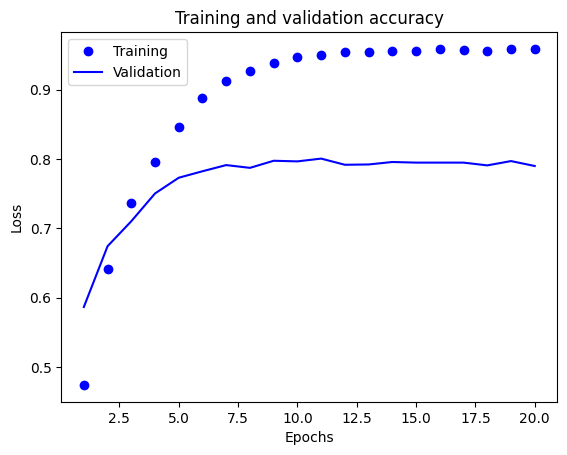

In [117]:
# Plotting the accuracy for training and validation

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plot_epochs(range(1, len(loss) + 1), 
            accuracy, 
            "bo", "Training", 
            val_accuracy, "b", "Validation", 
            "Training and validation accuracy", 
            "Epochs", "Loss")

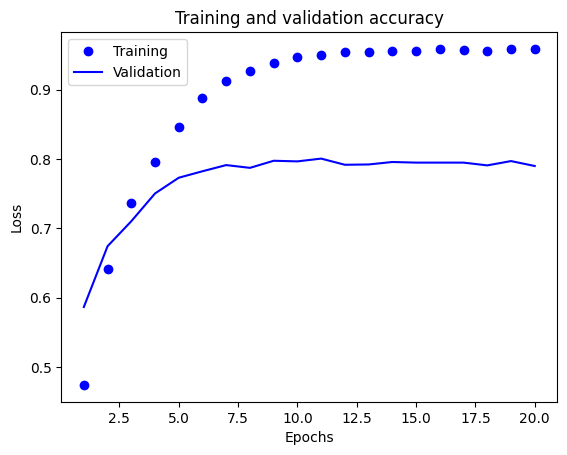

In [118]:
# Plotting the accuracy for training and validation

plot_epochs(range(1, len(loss) + 1), 
            accuracy, 
            "bo", "Training", 
            val_accuracy, "b", "Validation", 
            "Training and validation accuracy", 
            "Epochs", "Loss")

<div class="alert alert-block alert-info">  
    <center><h2><strong>Predicting on new data</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
Load new unseen data: We take test samples from the Reuters dataset.
Vectorize the sequences: Convert them into the same format as training data.
Predict using the trained model: Outputs class probabilities (softmax values).
Get the predicted class: Use np.argmax() to find the most likely class.
Compare predictions to actual values: Check how well the model performs.
This will allow you to predict the category of new news articles using the trained model.
<hr>
<div>

In [129]:
# Helper functions for prediction

# Function to count number of correct predictions
def count_correct_predictions(y_test, predicted_classes):    
    true_classes = np.argmax(y_test, axis=1)
    
    return np.sum(predicted_classes == true_classes)
    

# Function to decode a news article
def decode_article(encoded_article):
    word_index = reuters.get_word_index()
    
    # Invert the word index to map integers back to words
    index_to_word = {index + 3: word for word, index in word_index.items()}

    # Special indices for padding, start of sequence, etc.
    index_to_word[0] = "[PAD]"    # Padding token
    index_to_word[1] = "[START]"  # Start of sequence token
    index_to_word[2] = "[UNK]"    # Unknown word token
    
    return " ".join(index_to_word.get(i, "[UNK]") for i in encoded_article)
    
# Function to print all the mispredictions up until n
def get_misprediction(n, x_test_texts, x_test_vectorized, y_test, predictions, predicted_classes):
    if n  > len(y_test):
        return None
    
    for i in range(n):
        if predicted_classes[i] != y_test[i]:  # If prediction is incorrect
            print(f"Text: {decode_article(x_test_texts[i])}\nPredicted: {predicted_classes[i]}, Expected: {y_test[i]}\n")

In [136]:
# Make predictions on unseen data
predictions = model.predict(vectorized_test_data)

# Convert softmax output to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Showing examples of the results an example of a misprediction
get_misprediction(5, test_data, vectorized_test_data, test_labels, predictions, predicted_classes)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step
Text: [START] [UNK] [UNK] oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north [UNK] fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to [UNK] principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the [UNK] exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3
Predicted: 16, Expected: 4

Text:

In [134]:
# predicted_classes = np.argmax(predictions, axis=1)

# correct_predictions = count_correct_predictions(test_data, predicted_classes)
# print("Number of correct predictions: ", correct_predictions)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Model tuning</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
The model above is overfitting. The training accuracy reaches 96%, while the validation accuracy stagnates around 79-80% and the loss starts increasing after a few epochs. To optimize the model, we need to apply regularization, better dropout, and fine-tune hyperparameters.
<hr>
<div>

In [138]:
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers, callbacks

# Define the optimized model
def build_optimized_model():
    model = models.Sequential([
        layers.Dense(64, activation="relu", input_shape=(10000,), 
                     kernel_regularizer=regularizers.l2(0.001)),  # L2 regularization
        layers.Dropout(0.5),  # Dropout to reduce overfitting
        layers.Dense(32, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.3),
        layers.Dense(46, activation="softmax")  # Output layer
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    return model

# Early stopping callback
early_stopping = callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# vectorized_train_data = vectorize_sequences(train_data)
# vectorized_test_data = vectorize_sequences(test_data)

# vectorized_train_labels = to_categorical(train_labels)
# vectorized_test_labels = to_categorical(test_labels)

# Train the model
optimized_model = build_optimized_model()
optimized_model_history = optimized_model.fit(
    vectorized_train_data, vectorized_train_labels,
    epochs=20, batch_size=512,
    validation_data=(vectorized_test_data, vectorized_test_labels),
    callbacks=[early_stopping]
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(vectorized_test_data, vectorized_test_labels)
print(f"Optimized Test Accuracy: {test_acc:.4f}")


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1588 - loss: 3.7286 - val_accuracy: 0.4715 - val_loss: 2.7973
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4216 - loss: 2.7498 - val_accuracy: 0.6109 - val_loss: 1.9541
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5630 - loss: 2.0273 - val_accuracy: 0.6612 - val_loss: 1.6360
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6322 - loss: 1.6927 - val_accuracy: 0.6839 - val_loss: 1.5056
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6644 - loss: 1.5349 - val_accuracy: 0.6932 - val_loss: 1.4391
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6830 - loss: 1.4624 - val_accuracy: 0.7035 - val_loss: 1.3864
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7098 - loss: 1.3575 - val_accuracy: 0.7106 - val_loss: 1.3558
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 1.2845 - val_accuracy: 0.7280 - val_loss

Expected Improvements
Aspect	Before Optimization	After Optimization
Training Accuracy	96%	~85-90%
Validation Accuracy	79-80%	82-85%
Overfitting	Severe	Reduced
Loss Divergence	Increasing after 10 epochs	More stable